In [1]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway', 'latency']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = {}
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        data[client] = client_data.resample('2Min')['gateway','latency']
    return data

data = read_clients("gateways")


In [34]:
len(data)

20

In [ ]:
from math import*
from functools import reduce

def square_rooted(x):
    y = [a*a for a in x]
    return sqrt(sum(y))

 
def cosine_similarity(x,y):
    a = []
    b = []
    
    for key in x:
        if key in y:
            a.append(x[key][0])
            b.append(y[key][0])
    if len(b) == 0:
        return -1
    numerator = sum(a1*b1 for a1,b1 in zip(a,b))
    denominator = square_rooted(a)*square_rooted(b)
    return numerator/float(denominator)
    #print(i,len(y),numerator/float(denominator))
    #return round(numerator/float(denominator),3)



elements = list(data.keys()) #20
size = len(data[list(elements)[0]]) #721
j=7


while j<len(elements):
    i=0
    test1 = {}
    keys = {}
    compared = list(data[elements[j]])
    size = len(compared)
    result = pd.DataFrame()
    while i<size:
        avg = 0
        for element in elements:
            if element == elements[j]:
                continue
            test = list(data[element])
            if len(test)<len(compared):
                size  = len(test)
            #while(i<size):
            date = list(data[element])[i][0]
            comp = compared[i][1]
            comp = comp.drop(columns=['time'])
            comp = comp.set_index('gateway')
            test1 = comp.T.to_dict('list')

            temp =  list(data[element])[i][1]
            temp = temp.drop(columns=['time'])
            temp = temp.set_index('gateway')
            test2 = temp.T.to_dict('list')

            avg += cosine_similarity(test1, test2)

        print(date,':',avg/(len(elements)-1))
        result = result.append({'time':date, 'similarity':avg/(len(elements)-1)}, ignore_index=True)
        i+=1

    result = result.set_index('time')
    result.to_csv('result'+str(j)+'.csv')
    j +=1

2018-11-14 12:30:00 : 0.8481388386994089
2018-11-14 12:32:00 : 0.8177624439255532
2018-11-14 12:34:00 : 0.9786462918606869
2018-11-14 12:36:00 : 0.9762464460919994
2018-11-14 12:38:00 : 0.9128737373063509
2018-11-14 12:40:00 : 0.9752687928187707


C:\Users\Khulan\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:57: UserWarning: DataFrame columns are not unique, some columns will be omitted.


2018-11-14 12:42:00 : 0.9528218374628863
2018-11-14 12:44:00 : 0.9488169923384299
2018-11-14 12:46:00 : 0.9991768091508918
2018-11-14 12:48:00 : 0.7304533383581621


C:\Users\Khulan\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:52: UserWarning: DataFrame columns are not unique, some columns will be omitted.


2018-11-14 12:50:00 : 0.9681753609755145
2018-11-14 12:52:00 : 0.7884222387592037
2018-11-14 12:54:00 : 0.9634873847516743
2018-11-14 12:56:00 : 0.9703025969121027
2018-11-14 12:58:00 : 0.6522422679275192
2018-11-14 13:00:00 : 0.9380178782101863
2018-11-14 13:02:00 : 0.9845137473805807
2018-11-14 13:04:00 : 0.9758970298070009
2018-11-14 13:06:00 : 0.9786796349611885
2018-11-14 13:08:00 : 0.9753929880865433
2018-11-14 13:10:00 : 0.986979809657604
2018-11-14 13:12:00 : 0.8444430090120315
2018-11-14 13:14:00 : 0.9121661816385045
2018-11-14 13:16:00 : 0.9481402107942154
2018-11-14 13:18:00 : 0.9670021929378823
2018-11-14 13:20:00 : 0.8126058811473785
2018-11-14 13:22:00 : 0.9641004326864985
2018-11-14 13:24:00 : 0.9418603140187627
2018-11-14 13:26:00 : 0.9794010833791132
2018-11-14 13:28:00 : 0.9769237855864501
2018-11-14 13:30:00 : 0.870570439242986
2018-11-14 13:32:00 : 0.9868284154228332
2018-11-14 13:34:00 : 0.9815211850921076
2018-11-14 13:36:00 : 0.9721890661995761
2018-11-14 13:38:0

2018-11-14 19:32:00 : 0.6801714793516352
2018-11-14 19:34:00 : 0.6511370743325614
2018-11-14 19:36:00 : 0.6846189082599136
2018-11-14 19:38:00 : 0.6965501080050139
2018-11-14 19:40:00 : 0.6770602659050263
2018-11-14 19:42:00 : 0.6905506208614984
2018-11-14 19:44:00 : 0.6656941560502521
2018-11-14 19:46:00 : 0.6674196390790541
2018-11-14 19:48:00 : 0.6938152586572931
2018-11-14 19:50:00 : 0.7122569508702764
2018-11-14 19:52:00 : 0.6669198068328628
2018-11-14 19:54:00 : 0.6334404696769445
2018-11-14 19:56:00 : 0.6895437537742627
2018-11-14 19:58:00 : 0.661960057118867
2018-11-14 20:00:00 : 0.6658603663092449
2018-11-14 20:02:00 : 0.6915773970308664
2018-11-14 20:04:00 : 0.6985122823635201
2018-11-14 20:06:00 : 0.6816429577073966
2018-11-14 20:08:00 : 0.6693613659652587
2018-11-14 20:10:00 : 0.6658783016122906
2018-11-14 20:12:00 : 0.6600370306372966
2018-11-14 20:14:00 : 0.6903472477675758
2018-11-14 20:16:00 : 0.6885494489188254
2018-11-14 20:18:00 : 0.6680064206859985
2018-11-14 20:20:

2018-11-15 02:14:00 : 0.9190555465286878
2018-11-15 02:16:00 : 0.8917714642505432
2018-11-15 02:18:00 : 0.9529006540822351
2018-11-15 02:20:00 : 0.9674735600759115
2018-11-15 02:22:00 : 0.9561612490231988
2018-11-15 02:24:00 : 0.9696627124896552
2018-11-15 02:26:00 : 0.9405536445218728
2018-11-15 02:28:00 : 0.9674569528968926
2018-11-15 02:30:00 : 0.8458661381280264
2018-11-15 02:32:00 : 0.9685285190823218
2018-11-15 02:34:00 : 0.8887941524408726
2018-11-15 02:36:00 : 0.9359643906946185
2018-11-15 02:38:00 : 0.9474900877814654
2018-11-15 02:40:00 : 0.9235603512736192
2018-11-15 02:42:00 : 0.9653929803433801
2018-11-15 02:44:00 : 0.9638849015908153
2018-11-15 02:46:00 : 0.8975877083506987
2018-11-15 02:48:00 : 0.9507906283988321
2018-11-15 02:50:00 : 0.9530322383363842
2018-11-15 02:52:00 : 0.9557906365970261
2018-11-15 02:54:00 : 0.9649645027677879
2018-11-15 02:56:00 : 0.933424821132012
2018-11-15 02:58:00 : 0.9672972540740057
2018-11-15 03:00:00 : 0.7871058414507616
2018-11-15 03:02:

2018-11-15 08:56:00 : 0.9041100878153447
2018-11-15 08:58:00 : 0.9588820131155612
2018-11-15 09:00:00 : 0.8391459175638242
2018-11-15 09:02:00 : 0.8802903225080525
2018-11-15 09:04:00 : 0.819230079393504
2018-11-15 09:06:00 : 0.9686490367275858
2018-11-15 09:08:00 : 0.943005873647175
2018-11-15 09:10:00 : 0.9715897475744553
2018-11-15 09:12:00 : 0.9492926606674014
2018-11-15 09:14:00 : 0.9001654910278836
2018-11-15 09:16:00 : 0.9409453705231473
2018-11-15 09:18:00 : 0.8192281364499271
2018-11-15 09:20:00 : 0.9241731546617423
2018-11-15 09:22:00 : 0.9610563629547513
2018-11-15 09:24:00 : 0.9726079795755324
2018-11-15 09:26:00 : 0.9735032288980777
2018-11-15 09:28:00 : 0.9445870459361958
2018-11-15 09:30:00 : 0.8838007190482293
2018-11-15 09:32:00 : 0.973563576739504
2018-11-15 09:34:00 : 0.9042923305618412
2018-11-15 09:36:00 : 0.9691586548380807
2018-11-15 09:38:00 : 0.8530111556350833
2018-11-15 09:40:00 : 0.9146385608699177
2018-11-15 09:42:00 : 0.9668945520020236
2018-11-15 09:44:00

2018-11-14 15:36:00 : 0.7835192084354867
2018-11-14 15:38:00 : 0.7767040694684656
2018-11-14 15:40:00 : 0.7909385728122175
2018-11-14 15:42:00 : 0.7723729052720005
2018-11-14 15:44:00 : 0.7145941443367851
2018-11-14 15:46:00 : 0.7522484994455788
2018-11-14 15:48:00 : 0.7651233451838283
2018-11-14 15:50:00 : 0.6596982583238148
2018-11-14 15:52:00 : 0.766874615769501
2018-11-14 15:54:00 : 0.6304436049726623
2018-11-14 15:56:00 : 0.7379261906432031
2018-11-14 15:58:00 : 0.6820389870603275
2018-11-14 16:00:00 : 0.7732051229083723
2018-11-14 16:02:00 : 0.779572997009923
2018-11-14 16:04:00 : 0.7619476754909633
2018-11-14 16:06:00 : 0.6978039401782217
2018-11-14 16:08:00 : 0.6107429076519167
2018-11-14 16:10:00 : 0.7867573012726169
2018-11-14 16:12:00 : 0.7616667724476628
2018-11-14 16:14:00 : 0.7755012025085438
2018-11-14 16:16:00 : 0.6973418303266431
2018-11-14 16:18:00 : 0.5798274714093843
2018-11-14 16:20:00 : 0.7417254357944627
2018-11-14 16:22:00 : 0.7721079424212918
2018-11-14 16:24:0

2018-11-14 22:18:00 : 0.9574694292428886
2018-11-14 22:20:00 : 0.9573583127079478
2018-11-14 22:22:00 : 0.9475100626918511
2018-11-14 22:24:00 : 0.9560139194246384
2018-11-14 22:26:00 : 0.9454289179641888
2018-11-14 22:28:00 : 0.9608843495020818
2018-11-14 22:30:00 : 0.7173876825596444
2018-11-14 22:32:00 : 0.901633216180845
2018-11-14 22:34:00 : 0.9543775745745375
2018-11-14 22:36:00 : 0.9379970830716534
2018-11-14 22:38:00 : 0.9706086576174028
2018-11-14 22:40:00 : 0.9197732465992061
2018-11-14 22:42:00 : 0.9298144121476811
2018-11-14 22:44:00 : 0.8580601486658705
2018-11-14 22:46:00 : 0.9470850020446873
2018-11-14 22:48:00 : 0.9700201903682187
2018-11-14 22:50:00 : 0.9315815178533229
2018-11-14 22:52:00 : 0.9584283747772177
2018-11-14 22:54:00 : 0.9725847152977168
2018-11-14 22:56:00 : 0.93071944215723
2018-11-14 22:58:00 : 0.8872152229444188
2018-11-14 23:00:00 : 0.6632966003147246
2018-11-14 23:02:00 : 0.7372507605710372
2018-11-14 23:04:00 : 0.7613297603654562
2018-11-14 23:06:00

2018-11-15 05:00:00 : 0.8779778900493561
2018-11-15 05:02:00 : 0.8384028467431569
2018-11-15 05:04:00 : 0.9553462025949846
2018-11-15 05:06:00 : 0.8618750668521152
2018-11-15 05:08:00 : 0.9578132195669935
2018-11-15 05:10:00 : 0.9563065771430908
2018-11-15 05:12:00 : 0.9625811638764666
2018-11-15 05:14:00 : 0.6748975012171697
2018-11-15 05:16:00 : 0.9329961128331751
2018-11-15 05:18:00 : 0.8948277884593003
2018-11-15 05:20:00 : 0.9308731117372616
2018-11-15 05:22:00 : 0.9793127764230679
2018-11-15 05:24:00 : 0.9322117043261092
2018-11-15 05:26:00 : 0.9780922883184215
2018-11-15 05:28:00 : 0.9717797267687519
2018-11-15 05:30:00 : 0.8840907379079178
2018-11-15 05:32:00 : 0.911145072917841
2018-11-15 05:34:00 : 0.9156346249281111
2018-11-15 05:36:00 : 0.9817364192873868
2018-11-15 05:38:00 : 0.9551005857716914
2018-11-15 05:40:00 : 0.9141690509735352
2018-11-15 05:42:00 : 0.9601538648661707
2018-11-15 05:44:00 : 0.9092122295689717
2018-11-15 05:46:00 : 0.9483565077293508
2018-11-15 05:48:

2018-11-15 11:42:00 : 0.9809240839554325
2018-11-15 11:44:00 : 0.9580929573639977
2018-11-15 11:46:00 : 0.9700585246613249
2018-11-15 11:48:00 : 0.9319972983582349
2018-11-15 11:50:00 : 0.9349504542341139
2018-11-15 11:52:00 : 0.9400127133247467
2018-11-15 11:54:00 : 0.9373260059498765
2018-11-15 11:56:00 : 0.9250176711088269
2018-11-15 11:58:00 : 0.8904251794107529
2018-11-15 12:00:00 : 0.8978690895837534
2018-11-15 12:02:00 : 0.8928061300702981
2018-11-15 12:04:00 : 0.8166625215514948
2018-11-15 12:06:00 : 0.956679826628257
2018-11-15 12:08:00 : 0.8720910186180637
2018-11-15 12:10:00 : 0.9655203221730666
2018-11-15 12:12:00 : 0.8412238379987955
2018-11-15 12:14:00 : 0.9202412830858115
2018-11-15 12:16:00 : 0.9010422507018017
2018-11-15 12:18:00 : 0.934003807331908
2018-11-15 12:20:00 : 0.9456409773596811
2018-11-15 12:22:00 : 0.9642116526709029
2018-11-15 12:24:00 : 0.9509727885677313
2018-11-15 12:26:00 : 0.9461094743824338
2018-11-15 12:28:00 : 0.8759235666921663
2018-11-15 12:30:0

2018-11-14 18:22:00 : 0.7423859476266755
2018-11-14 18:24:00 : 0.7523795395274991
2018-11-14 18:26:00 : 0.7607945372559561
2018-11-14 18:28:00 : 0.3991436550192362
2018-11-14 18:30:00 : 0.7062056037495981
2018-11-14 18:32:00 : 0.742672993341049
2018-11-14 18:34:00 : 0.7548099836445099
2018-11-14 18:36:00 : 0.7405559395485282
2018-11-14 18:38:00 : 0.7405161642908616
2018-11-14 18:40:00 : 0.6123905690280287
2018-11-14 18:42:00 : 0.710313144768207
2018-11-14 18:44:00 : 0.7305338002439007
2018-11-14 18:46:00 : 0.7470033415521931
2018-11-14 18:48:00 : 0.5703093604340116
2018-11-14 18:50:00 : 0.7087627914272291
2018-11-14 18:52:00 : 0.7461702878570301
2018-11-14 18:54:00 : 0.7431336221835384
2018-11-14 18:56:00 : 0.7428302243354817
2018-11-14 18:58:00 : 0.5181174467451158
2018-11-14 19:00:00 : 0.7162513849146362
2018-11-14 19:02:00 : 0.7264533942188695
2018-11-14 19:04:00 : 0.6931379045083407
2018-11-14 19:06:00 : 0.7496997201896168
2018-11-14 19:08:00 : 0.7457998211843374
2018-11-14 19:10:0

2018-11-15 01:04:00 : 0.9449401148981741
2018-11-15 01:06:00 : 0.844723102735999
2018-11-15 01:08:00 : 0.9575220019213071
2018-11-15 01:10:00 : 0.9200969757889295
2018-11-15 01:12:00 : 0.8490229358456753
2018-11-15 01:14:00 : 0.9422920405577657
2018-11-15 01:16:00 : 0.9213910334294164
2018-11-15 01:18:00 : 0.9439075425519338
2018-11-15 01:20:00 : 0.9449234903098195
2018-11-15 01:22:00 : 0.9595326246160418
2018-11-15 01:24:00 : 0.9276387101584672
2018-11-15 01:26:00 : 0.9361532334142116
2018-11-15 01:28:00 : 0.946875379135449
2018-11-15 01:30:00 : 0.7631726265541658
2018-11-15 01:32:00 : 0.9721304801224303
2018-11-15 01:34:00 : 0.9785101044480482
2018-11-15 01:36:00 : 0.9266475885266496
2018-11-15 01:38:00 : 0.9636407869079772
2018-11-15 01:40:00 : 0.9633841485510793
2018-11-15 01:42:00 : 0.884961777915843
2018-11-15 01:44:00 : 0.9740233642492228
2018-11-15 01:46:00 : 0.7025352283932884
2018-11-15 01:48:00 : 0.9236536286600824
2018-11-15 01:50:00 : 0.938278744939455
2018-11-15 01:52:00 

2018-11-15 07:46:00 : 0.9654026963945954
2018-11-15 07:48:00 : 0.9502017203194889
2018-11-15 07:50:00 : 0.9537094610063557
2018-11-15 07:52:00 : 0.980943175437375
2018-11-15 07:54:00 : 0.964073354977936
2018-11-15 07:56:00 : 0.943985202693463
2018-11-15 07:58:00 : 0.9372507184121481
2018-11-15 08:00:00 : 0.732416079451465
2018-11-15 08:02:00 : 0.9197089545292794
2018-11-15 08:04:00 : 0.8805592421198751
2018-11-15 08:06:00 : 0.9046625340143782
2018-11-15 08:08:00 : 0.9223133726832569
2018-11-15 08:10:00 : 0.9682298085406856
2018-11-15 08:12:00 : 0.9440696708644799
2018-11-15 08:14:00 : 0.9629185896012031
2018-11-15 08:16:00 : 0.9577371861445109
2018-11-15 08:18:00 : 0.7583577675913494
2018-11-15 08:20:00 : 0.9769483000246303
2018-11-15 08:22:00 : 0.9429518957630261
2018-11-15 08:24:00 : 0.9645469895486822
2018-11-15 08:26:00 : 0.9645157554700521
2018-11-15 08:28:00 : 0.887942748619632
2018-11-15 08:30:00 : 0.8958806798533261
2018-11-15 08:32:00 : 0.9735820011143139
2018-11-15 08:34:00 :

2018-11-14 14:26:00 : 0.5973639605784685
2018-11-14 14:28:00 : 0.5895392082192152
2018-11-14 14:30:00 : 0.5419734027311428
2018-11-14 14:32:00 : 0.6030795058089699
2018-11-14 14:34:00 : 0.6162718083913642
2018-11-14 14:36:00 : 0.5776570986398355
2018-11-14 14:38:00 : 0.5514789294253476
2018-11-14 14:40:00 : 0.6116590131086225
2018-11-14 14:42:00 : 0.5761629509269252
2018-11-14 14:44:00 : 0.6011657865659641
2018-11-14 14:46:00 : 0.5947955914870163
2018-11-14 14:48:00 : 0.5741872988207739
2018-11-14 14:50:00 : 0.5848197579324683
2018-11-14 14:52:00 : 0.6121691494576569
2018-11-14 14:54:00 : 0.5700570423732909
2018-11-14 14:56:00 : 0.5959275337989638
2018-11-14 14:58:00 : 0.6522790515616578
2018-11-14 15:00:00 : 0.568963216158242
2018-11-14 15:02:00 : 0.5157491325874776
2018-11-14 15:04:00 : 0.6066471047902278
2018-11-14 15:06:00 : 0.458218962806164
2018-11-14 15:08:00 : 0.4540019693011598
2018-11-14 15:10:00 : 0.5830798070073672
2018-11-14 15:12:00 : 0.6073126272162512
2018-11-14 15:14:0

2018-11-14 21:08:00 : 0.9566910245472621
2018-11-14 21:10:00 : 0.9107225772783094
2018-11-14 21:12:00 : 0.9491413793094012
2018-11-14 21:14:00 : 0.8812332430730727
2018-11-14 21:16:00 : 0.9482891299286229
2018-11-14 21:18:00 : 0.8824378579801321
2018-11-14 21:20:00 : 0.9541529703652093
2018-11-14 21:22:00 : 0.961326775948839
2018-11-14 21:24:00 : 0.9579144215958402
2018-11-14 21:26:00 : 0.9353297301085225
2018-11-14 21:28:00 : 0.9002810414974898
2018-11-14 21:30:00 : 0.6789423074046638
2018-11-14 21:32:00 : 0.9346094468019914
2018-11-14 21:34:00 : 0.9410778713494693
2018-11-14 21:36:00 : 0.9284445025090733
2018-11-14 21:38:00 : 0.9095267468168649
2018-11-14 21:40:00 : 0.8690952050322487
2018-11-14 21:42:00 : 0.9462424871014118
2018-11-14 21:44:00 : 0.9508767269497816
2018-11-14 21:46:00 : 0.6782794539312744
2018-11-14 21:48:00 : 0.8298779148132641
2018-11-14 21:50:00 : 0.9233058106668812
2018-11-14 21:52:00 : 0.9443862828612903
2018-11-14 21:54:00 : 0.962211674900301
2018-11-14 21:56:0

2018-11-15 03:50:00 : 0.9372891906047751
2018-11-15 03:52:00 : 0.941719399537148
2018-11-15 03:54:00 : 0.9616975722079069
2018-11-15 03:56:00 : 0.9353730782026378
2018-11-15 03:58:00 : 0.9595579067502116
2018-11-15 04:00:00 : 0.7988707335386229
2018-11-15 04:02:00 : 0.960426418087823
2018-11-15 04:04:00 : 0.9501890136557827
2018-11-15 04:06:00 : 0.9136000893465454
2018-11-15 04:08:00 : 0.9483235377415129
2018-11-15 04:10:00 : 0.9667443176132726
2018-11-15 04:12:00 : 0.9769158340583859
2018-11-15 04:14:00 : 0.8862994095964011
2018-11-15 04:16:00 : 0.961789348356905
2018-11-15 04:18:00 : 0.8961569377152541
2018-11-15 04:20:00 : 0.8335829114805904
2018-11-15 04:22:00 : 0.9041331348065429
2018-11-15 04:24:00 : 0.9358403592320167
2018-11-15 04:26:00 : 0.9587437023400924
2018-11-15 04:28:00 : 0.949913515908981
2018-11-15 04:30:00 : 0.9253119226160077
2018-11-15 04:32:00 : 0.835228688901818
2018-11-15 04:34:00 : 0.955697387115995
2018-11-15 04:36:00 : 0.9403485901799513
2018-11-15 04:38:00 : 

2018-11-15 10:32:00 : 0.8948867111082496
2018-11-15 10:34:00 : 0.8079580976589047
2018-11-15 10:36:00 : 0.9676560088477514
2018-11-15 10:38:00 : 0.956131343905318
2018-11-15 10:40:00 : 0.8535985477545774
2018-11-15 10:42:00 : 0.9539621878221695
2018-11-15 10:44:00 : 0.894522918468435
2018-11-15 10:46:00 : 0.9170406120530711
2018-11-15 10:48:00 : 0.8448150785099375
2018-11-15 10:50:00 : 0.8684286108461218
2018-11-15 10:52:00 : 0.8603624470873081
2018-11-15 10:54:00 : 0.9702644587829384
2018-11-15 10:56:00 : 0.9635932185530202
2018-11-15 10:58:00 : 0.7705608324337136
2018-11-15 11:00:00 : 0.9108359555116737
2018-11-15 11:02:00 : 0.9575310947725587
2018-11-15 11:04:00 : 0.9499588269724104
2018-11-15 11:06:00 : 0.9367626872139119
2018-11-15 11:08:00 : 0.9542909437041502
2018-11-15 11:10:00 : 0.96680122031294
2018-11-15 11:12:00 : 0.8205580268095327
2018-11-15 11:14:00 : 0.9310364456281309
2018-11-15 11:16:00 : 0.9692919666511168
2018-11-15 11:18:00 : 0.933553639598178
2018-11-15 11:20:00 :

2018-11-14 17:12:00 : 0.7017327710950402
2018-11-14 17:14:00 : 0.7116090254193024
2018-11-14 17:16:00 : 0.6803722652641694
2018-11-14 17:18:00 : 0.6391744212781234
2018-11-14 17:20:00 : 0.7222263011934302
2018-11-14 17:22:00 : 0.7207316061405475
2018-11-14 17:24:00 : 0.7240531550593505
2018-11-14 17:26:00 : 0.6715365640969007
2018-11-14 17:28:00 : 0.6180006133270702
2018-11-14 17:30:00 : 0.6441413002122409
2018-11-14 17:32:00 : 0.6768014361670452
2018-11-14 17:34:00 : 0.6952134309765049
2018-11-14 17:36:00 : 0.6854643424008856
2018-11-14 17:38:00 : 0.6776276681488923
2018-11-14 17:40:00 : 0.7177261215974312
2018-11-14 17:42:00 : 0.6880723280691271
2018-11-14 17:44:00 : 0.677509542169223
2018-11-14 17:46:00 : 0.6958308976415462
2018-11-14 17:48:00 : 0.4434837808833459
2018-11-14 17:50:00 : 0.7317938428132765
2018-11-14 17:52:00 : 0.7212736876165536
2018-11-14 17:54:00 : 0.7070730364161746
2018-11-14 17:56:00 : 0.6909979602775458
2018-11-14 17:58:00 : 0.7228334275263024
2018-11-14 18:00:

2018-11-14 23:54:00 : 0.9244234935215204
2018-11-14 23:56:00 : 0.9324005219689737
2018-11-14 23:58:00 : 0.976620150287102
2018-11-15 00:00:00 : 0.7778820289991605
2018-11-15 00:02:00 : 0.7992666795570615
2018-11-15 00:04:00 : 0.8900367776208916
2018-11-15 00:06:00 : 0.9769843273248393
2018-11-15 00:08:00 : 0.9717373922244952
2018-11-15 00:10:00 : 0.935313590015533
2018-11-15 00:12:00 : 0.9705886974136672
2018-11-15 00:14:00 : 0.9388630458521092
2018-11-15 00:16:00 : 0.9722937530082988
2018-11-15 00:18:00 : 0.8685681919469045
2018-11-15 00:20:00 : 0.9338649703849488
2018-11-15 00:22:00 : 0.962230714497324
2018-11-15 00:24:00 : 0.5161249450604507
2018-11-15 00:26:00 : 0.9779632631446326
2018-11-15 00:28:00 : 0.888014894975677
2018-11-15 00:30:00 : 0.8676198534097708
2018-11-15 00:32:00 : 0.9763318619868492
2018-11-15 00:34:00 : 0.9873186156245507
2018-11-15 00:36:00 : 0.9743178235202076
2018-11-15 00:38:00 : 0.8953190161731265
2018-11-15 00:40:00 : 0.9717136447081529
2018-11-15 00:42:00 

2018-11-15 06:36:00 : 0.8975183398015038
2018-11-15 06:38:00 : 0.9672349842624502
2018-11-15 06:40:00 : 0.9589001143557097
2018-11-15 06:42:00 : 0.9384246650643618
2018-11-15 06:44:00 : 0.9072436575797402
2018-11-15 06:46:00 : 0.9806868389620882
2018-11-15 06:48:00 : 0.8757418431377383
2018-11-15 06:50:00 : 0.9790389263987125
2018-11-15 06:52:00 : 0.973191412987893
2018-11-15 06:54:00 : 0.9729912503147117
2018-11-15 06:56:00 : 0.8916268261290526
2018-11-15 06:58:00 : 0.9797271995326833
2018-11-15 07:00:00 : 0.7693779209173893
2018-11-15 07:02:00 : 0.929870543106547
2018-11-15 07:04:00 : 0.9688899526891092
2018-11-15 07:06:00 : 0.9240134569098278
2018-11-15 07:08:00 : 0.9251984341902431
2018-11-15 07:10:00 : 0.8326865684257646
2018-11-15 07:12:00 : 0.6057918392922546
2018-11-15 07:14:00 : 0.9542332475178235
2018-11-15 07:16:00 : 0.9579321685133363
2018-11-15 07:18:00 : 0.9785667475755103
2018-11-15 07:20:00 : 0.9434950756042081
2018-11-15 07:22:00 : 0.8792410745057684
2018-11-15 07:24:0

2018-11-14 13:16:00 : 0.9319669325429749
2018-11-14 13:18:00 : 0.9490221013494524
2018-11-14 13:20:00 : 0.8552237320253524
2018-11-14 13:22:00 : 0.852398815876766
2018-11-14 13:24:00 : 0.9498961083485341
2018-11-14 13:26:00 : 0.9865146718750525
2018-11-14 13:28:00 : 0.9852428403650421
2018-11-14 13:30:00 : 0.8239055532966201
2018-11-14 13:32:00 : 0.9821742360731202
2018-11-14 13:34:00 : 0.9794819374899205
2018-11-14 13:36:00 : 0.9702842905546097
2018-11-14 13:38:00 : 0.9715210357674905
2018-11-14 13:40:00 : 0.996343875535027
2018-11-14 13:42:00 : 0.9815944391700466
2018-11-14 13:44:00 : 0.5257493908911516
2018-11-14 13:46:00 : 0.5057128517585419
2018-11-14 13:48:00 : 0.9885800211614603
2018-11-14 13:50:00 : 0.511785258496269
2018-11-14 13:52:00 : 0.5283456687997737
2018-11-14 13:54:00 : 0.510092457965399
2018-11-14 13:56:00 : 0.5076247946426292
2018-11-14 13:58:00 : 0.5152459582051907
2018-11-14 14:00:00 : 0.573748573462514
2018-11-14 14:02:00 : 0.5057865950709921
2018-11-14 14:04:00 :

2018-11-14 19:56:00 : 0.5115520900316548
2018-11-14 19:58:00 : 0.5028942772025305
2018-11-14 20:00:00 : 0.471706624758574
2018-11-14 20:02:00 : 0.5044159690703371
2018-11-14 20:04:00 : 0.49542617401861105
2018-11-14 20:06:00 : 0.5060628055625588
2018-11-14 20:08:00 : 0.49961395717021573
2018-11-14 20:10:00 : 0.5057268132806791
2018-11-14 20:12:00 : 0.49113918824112146
2018-11-14 20:14:00 : 0.49766351965068073
2018-11-14 20:16:00 : 0.4970151305444915
2018-11-14 20:18:00 : 0.4699427386738305
2018-11-14 20:20:00 : 0.5089934054162256
2018-11-14 20:22:00 : 0.5041311017633795
2018-11-14 20:24:00 : 0.4770105884305065
2018-11-14 20:26:00 : 0.5237990124292579
2018-11-14 20:28:00 : 0.48959344948940187
2018-11-14 20:30:00 : 0.42412336683783886
2018-11-14 20:32:00 : 0.4781444844396469
2018-11-14 20:34:00 : 0.9079381460852046
2018-11-14 20:36:00 : 0.921950995346875
2018-11-14 20:38:00 : 0.5874107203078919
2018-11-14 20:40:00 : 0.7157452904195146
2018-11-14 20:42:00 : 0.8833864571063013
2018-11-14 2

2018-11-15 02:38:00 : 0.9406912510345847
2018-11-15 02:40:00 : 0.8968984982272008
2018-11-15 02:42:00 : 0.879029902480803
2018-11-15 02:44:00 : 0.9273243292889182
2018-11-15 02:46:00 : 0.8953385367906567
2018-11-15 02:48:00 : 0.902790237362004
2018-11-15 02:50:00 : 0.9505945758437148
2018-11-15 02:52:00 : 0.927167722986962
2018-11-15 02:54:00 : 0.9654279117224002
2018-11-15 02:56:00 : 0.9601377074931179
2018-11-15 02:58:00 : 0.9573695155651749
2018-11-15 03:00:00 : 0.747793880928437
2018-11-15 03:02:00 : 0.8850460301118795
2018-11-15 03:04:00 : 0.9505210803820848
2018-11-15 03:06:00 : 0.9510635196984075
2018-11-15 03:08:00 : 0.8193355346117068
2018-11-15 03:10:00 : 0.9344041684145646
2018-11-15 03:12:00 : 0.9493573226916358
2018-11-15 03:14:00 : 0.8955670763016249
2018-11-15 03:16:00 : 0.9412904948164155
2018-11-15 03:18:00 : 0.9025910155621184
2018-11-15 03:20:00 : 0.9398655376483479
2018-11-15 03:22:00 : 0.9364781937236846
2018-11-15 03:24:00 : 0.9168275375392623
2018-11-15 03:26:00 

2018-11-15 09:20:00 : 0.8603154886987149
2018-11-15 09:22:00 : 0.9608350620360904
2018-11-15 09:24:00 : 0.9189931128095075
2018-11-15 09:26:00 : 0.9513752897473201
2018-11-15 09:28:00 : 0.895510466102785
2018-11-15 09:30:00 : 0.7862527886677482
2018-11-15 09:32:00 : 0.9645777863091655
2018-11-15 09:34:00 : 0.9576051883005998
2018-11-15 09:36:00 : 0.9583227018403467
2018-11-15 09:38:00 : 0.9038993781153479
2018-11-15 09:40:00 : 0.92992635541126
2018-11-15 09:42:00 : 0.9297440389726963
2018-11-15 09:44:00 : 0.8631357688371575
2018-11-15 09:46:00 : 0.8930362649622169
2018-11-15 09:48:00 : 0.9257902239754735
2018-11-15 09:50:00 : 0.912093891872634
2018-11-15 09:52:00 : 0.8787110584371575
2018-11-15 09:54:00 : 0.9470488665553762
2018-11-15 09:56:00 : 0.8804406947646221
2018-11-15 09:58:00 : 0.8327887003401868
2018-11-15 10:00:00 : 0.6689106851240172
2018-11-15 10:02:00 : 0.7868035855687728
2018-11-15 10:04:00 : 0.960865943703532
2018-11-15 10:06:00 : 0.9370548429370927
2018-11-15 10:08:00 :

2018-11-14 15:58:00 : 0.37120552902326365
2018-11-14 16:00:00 : 0.3618591618954168
2018-11-14 16:02:00 : 0.4086742558540024
2018-11-14 16:04:00 : 0.4140537607739223
2018-11-14 16:06:00 : 0.37604351267646846
2018-11-14 16:08:00 : 0.40411860342805744
2018-11-14 16:10:00 : 0.4209987009485968
2018-11-14 16:12:00 : 0.41559053009799574
2018-11-14 16:14:00 : 0.4094005761826085
2018-11-14 16:16:00 : 0.3863387778673715
2018-11-14 16:18:00 : 0.3890946644326862
2018-11-14 16:20:00 : 0.41061138423260035
2018-11-14 16:22:00 : 0.420661967510234
2018-11-14 16:24:00 : 0.41210649641825603
2018-11-14 16:26:00 : 0.42540661490765347
2018-11-14 16:28:00 : 0.39868992589272495
2018-11-14 16:30:00 : 0.32411053897789666
2018-11-14 16:32:00 : 0.41972601530073933
2018-11-14 16:34:00 : 0.3022671210458133
2018-11-14 16:36:00 : 0.4223137422188145
2018-11-14 16:38:00 : 0.4208602098051082
2018-11-14 16:40:00 : 0.43013566844718215
2018-11-14 16:42:00 : 0.418774253958819
2018-11-14 16:44:00 : 0.42251885502876496
2018-1

2018-11-14 22:36:00 : 0.8965564805367215
2018-11-14 22:38:00 : 0.9611226583677442
2018-11-14 22:40:00 : 0.9267509313703426
2018-11-14 22:42:00 : 0.9679762238332186
2018-11-14 22:44:00 : 0.8805003053473405
2018-11-14 22:46:00 : 0.9395969851684661
2018-11-14 22:48:00 : 0.9249583620945697
2018-11-14 22:50:00 : 0.9216942914552909
2018-11-14 22:52:00 : 0.8720541422612476
2018-11-14 22:54:00 : 0.9258067171566715
2018-11-14 22:56:00 : 0.8677998333653395
2018-11-14 22:58:00 : 0.5067388202176177
2018-11-14 23:00:00 : 0.6550717300923821
2018-11-14 23:02:00 : 0.7696862459906365
2018-11-14 23:04:00 : 0.7886551139600335
2018-11-14 23:06:00 : 0.9554722617154056
2018-11-14 23:08:00 : 0.7891440076377735
2018-11-14 23:10:00 : 0.8470869443683399
2018-11-14 23:12:00 : 0.4280046784783364
2018-11-14 23:14:00 : 0.8095272892060836
2018-11-14 23:16:00 : 0.8444134613421302
2018-11-14 23:18:00 : 0.49420947874021526
2018-11-14 23:20:00 : 0.934303151456319
2018-11-14 23:22:00 : 0.9530101807521333
2018-11-14 23:24

2018-11-15 05:18:00 : 0.7978358574476876
2018-11-15 05:20:00 : 0.9212889588695895
2018-11-15 05:22:00 : 0.9641558076817599
2018-11-15 05:24:00 : 0.8840639686869863
2018-11-15 05:26:00 : 0.9825097932328761
2018-11-15 05:28:00 : 0.9355089682273139
2018-11-15 05:30:00 : 0.8748202830402045
2018-11-15 05:32:00 : 0.9174373315047597
2018-11-15 05:34:00 : 0.8502254622606299
2018-11-15 05:36:00 : 0.9824867101917133
2018-11-15 05:38:00 : 0.9766775282504855
2018-11-15 05:40:00 : 0.9173097734607772
2018-11-15 05:42:00 : 0.9662995004445106
2018-11-15 05:44:00 : 0.9700708975606247
2018-11-15 05:46:00 : 0.957900437913993
2018-11-15 05:48:00 : 0.8658295800671061
2018-11-15 05:50:00 : 0.9358347501336663
2018-11-15 05:52:00 : 0.9353193862511839
2018-11-15 05:54:00 : 0.9394812026633427
2018-11-15 05:56:00 : 0.9675516537178489
2018-11-15 05:58:00 : 0.953129642050223
2018-11-15 06:00:00 : 0.9091180708180149
2018-11-15 06:02:00 : 0.8597897424823678
2018-11-15 06:04:00 : 0.9507637056828081
2018-11-15 06:06:0

2018-11-15 12:00:00 : 0.883941377011151
2018-11-15 12:02:00 : 0.8633780172822815
2018-11-15 12:04:00 : 0.9266335671074466
2018-11-15 12:06:00 : 0.9502032699966013
2018-11-15 12:08:00 : 0.8208692298448295
2018-11-15 12:10:00 : 0.950444882707742
2018-11-15 12:12:00 : 0.6892999707611551
2018-11-15 12:14:00 : 0.9151051326223124
2018-11-15 12:16:00 : 0.9393106851783746
2018-11-15 12:18:00 : 0.7600836088604693
2018-11-15 12:20:00 : 0.9430587596004408
2018-11-15 12:22:00 : 0.8833385162694299
2018-11-15 12:24:00 : 0.9245051031878958
2018-11-15 12:26:00 : 0.965444638194617
2018-11-15 12:28:00 : 0.7126186411956105
2018-11-15 12:30:00 : 1.0
2018-11-14 12:30:00 : 0.818515125734052
2018-11-14 12:32:00 : 0.8095849982051558
2018-11-14 12:34:00 : 0.9698357563997174
2018-11-14 12:36:00 : 0.9759700863657934
2018-11-14 12:38:00 : 0.8829775094552874
2018-11-14 12:40:00 : 0.9629433423459455
2018-11-14 12:42:00 : 0.9652760880107776
2018-11-14 12:44:00 : 0.9475256454465532
2018-11-14 12:46:00 : 0.83147486686

2018-11-14 18:40:00 : 0.6946386830921177
2018-11-14 18:42:00 : 0.6859731507626775
2018-11-14 18:44:00 : 0.6882269684436867
2018-11-14 18:46:00 : 0.7469923285512683
2018-11-14 18:48:00 : 0.7008083998258529
2018-11-14 18:50:00 : 0.7325618164162013
2018-11-14 18:52:00 : 0.7674849995307647
2018-11-14 18:54:00 : 0.7656757011975244
2018-11-14 18:56:00 : 0.7464881933606032
2018-11-14 18:58:00 : 0.1653124286898502
2018-11-14 19:00:00 : 0.7087135049711402
2018-11-14 19:02:00 : 0.742938618528312
2018-11-14 19:04:00 : 0.7415938099702464
2018-11-14 19:06:00 : 0.7680154526870722
2018-11-14 19:08:00 : 0.7728727267430634
2018-11-14 19:10:00 : 0.7535816729987278
2018-11-14 19:12:00 : 0.7392053186905659
2018-11-14 19:14:00 : 0.7626414634098466
2018-11-14 19:16:00 : 0.7117296421480809
2018-11-14 19:18:00 : 0.7545788663680063
2018-11-14 19:20:00 : 0.7542176997598757
2018-11-14 19:22:00 : 0.76748663227528
2018-11-14 19:24:00 : 0.7141613129041693
2018-11-14 19:26:00 : 0.7562844934825506
2018-11-14 19:28:00

2018-11-15 01:22:00 : 0.9749344040695549
2018-11-15 01:24:00 : 0.9183114632242964
2018-11-15 01:26:00 : 0.9270815921995282
2018-11-15 01:28:00 : 0.9508401527599347
2018-11-15 01:30:00 : 0.7516927623300595
2018-11-15 01:32:00 : 0.9452837189377249
2018-11-15 01:34:00 : 0.9663070482167256
2018-11-15 01:36:00 : 0.876408682569352
2018-11-15 01:38:00 : 0.9659700431067385
2018-11-15 01:40:00 : 0.9463210521283612
2018-11-15 01:42:00 : 0.898552073615983
2018-11-15 01:44:00 : 0.9691035419788414
2018-11-15 01:46:00 : 0.538559414856919
2018-11-15 01:48:00 : 0.9243448204068899
2018-11-15 01:50:00 : 0.9598443786173788
2018-11-15 01:52:00 : 0.8988122933031686
2018-11-15 01:54:00 : 0.975155162256178
2018-11-15 01:56:00 : 0.9655739245266949
2018-11-15 01:58:00 : 0.9581373125023113
2018-11-15 02:00:00 : 0.8144827631309762
2018-11-15 02:02:00 : 0.9618587373511661
2018-11-15 02:04:00 : 0.9667726185495359
2018-11-15 02:06:00 : 0.9696296626455115
2018-11-15 02:08:00 : 0.9623210355461945
2018-11-15 02:10:00 

2018-11-15 08:04:00 : 0.8781286891343446
2018-11-15 08:06:00 : 0.8757742108484293
2018-11-15 08:08:00 : 0.8585115141283002
2018-11-15 08:10:00 : 0.9054043523537826
2018-11-15 08:12:00 : 0.9253885501561868
2018-11-15 08:14:00 : 0.9565268711072997
2018-11-15 08:16:00 : 0.914399921363403
2018-11-15 08:18:00 : 0.7470928766765395
2018-11-15 08:20:00 : 0.9637696153240581
2018-11-15 08:22:00 : 0.948505299669714
2018-11-15 08:24:00 : 0.9589030294925932
2018-11-15 08:26:00 : 0.9618345182042946
2018-11-15 08:28:00 : 0.9217809105733233
2018-11-15 08:30:00 : 0.8469780117669238
2018-11-15 08:32:00 : 0.944968619099115
2018-11-15 08:34:00 : 0.9539351913774536
2018-11-15 08:36:00 : 0.9635402047721231
2018-11-15 08:38:00 : 0.9326069113447004
2018-11-15 08:40:00 : 0.9624222856159584
2018-11-15 08:42:00 : 0.9510197885116017
2018-11-15 08:44:00 : 0.8965786280461053
2018-11-15 08:46:00 : 0.9435585266392977
2018-11-15 08:48:00 : 0.7287058365611202
2018-11-15 08:50:00 : 0.9624184519903345
2018-11-15 08:52:00

2018-11-14 14:44:00 : 0.7331919973740302
2018-11-14 14:46:00 : 0.7165321073674179
2018-11-14 14:48:00 : 0.6237906538667874
2018-11-14 14:50:00 : 0.7320957730619075
2018-11-14 14:52:00 : 0.7325346154518857
2018-11-14 14:54:00 : 0.6675805414352771
2018-11-14 14:56:00 : 0.7155736590731825
2018-11-14 14:58:00 : 0.6935924042947722
2018-11-14 15:00:00 : 0.7150654744933176
2018-11-14 15:02:00 : 0.6059863337233894
2018-11-14 15:04:00 : 0.7207439168322242
2018-11-14 15:06:00 : 0.15691583910246962
2018-11-14 15:08:00 : 0.5419770465733436
2018-11-14 15:10:00 : 0.691198184825599
2018-11-14 15:12:00 : 0.7270966924439294
2018-11-14 15:14:00 : 0.730671201965654
2018-11-14 15:16:00 : 0.7108702011080483
2018-11-14 15:18:00 : 0.7292312355058311
2018-11-14 15:20:00 : 0.7046518915570253
2018-11-14 15:22:00 : 0.7311149609606395
2018-11-14 15:24:00 : 0.5548720986558768
2018-11-14 15:26:00 : 0.7069859440338231
2018-11-14 15:28:00 : 0.7272930787790837
2018-11-14 15:30:00 : 0.3096465606591224
2018-11-14 15:32:

2018-11-14 21:26:00 : 0.9378753658475665
2018-11-14 21:28:00 : 0.9055116135788753
2018-11-14 21:30:00 : 0.820927406131787
2018-11-14 21:32:00 : 0.9200265417062403
2018-11-14 21:34:00 : 0.9424171494369289
2018-11-14 21:36:00 : 0.921737618373854
2018-11-14 21:38:00 : 0.9196867380905808
2018-11-14 21:40:00 : 0.8801228281261303
2018-11-14 21:42:00 : 0.9519416705758124
2018-11-14 21:44:00 : 0.9496160781404961
2018-11-14 21:46:00 : 0.9511759921484683
2018-11-14 21:48:00 : 0.8118189561073507
2018-11-14 21:50:00 : 0.8961712277804716
2018-11-14 21:52:00 : 0.9412220747171354
2018-11-14 21:54:00 : 0.9766157804280237
2018-11-14 21:56:00 : 0.9749350075817967
2018-11-14 21:58:00 : 0.9490813789014445
2018-11-14 22:00:00 : 0.544542664200405
2018-11-14 22:02:00 : 0.9626180776475056
2018-11-14 22:04:00 : 0.7012467855584317
2018-11-14 22:06:00 : 0.9486221276706238
2018-11-14 22:08:00 : 0.9494585683086985
2018-11-14 22:10:00 : 0.9034366130354926
2018-11-14 22:12:00 : 0.9464006961582856
2018-11-14 22:14:00

2018-11-15 04:08:00 : 0.9549075029052946
2018-11-15 04:10:00 : 0.9220435816725401
2018-11-15 04:12:00 : 0.9822948601219493
2018-11-15 04:14:00 : 0.9318854902963644
2018-11-15 04:16:00 : 0.9675676882283623
2018-11-15 04:18:00 : 0.9742178991837374
2018-11-15 04:20:00 : 0.9219959522933822
2018-11-15 04:22:00 : 0.9683724175781154
2018-11-15 04:24:00 : 0.9403918313500857
2018-11-15 04:26:00 : 0.9679405573350949
2018-11-15 04:28:00 : 0.9552728113695826
2018-11-15 04:30:00 : 0.9077558820187095
2018-11-15 04:32:00 : 0.734661137062845
2018-11-15 04:34:00 : 0.9166643542293237
2018-11-15 04:36:00 : 0.9329403892280319
2018-11-15 04:38:00 : 0.9657455650493941
2018-11-15 04:40:00 : 0.9240921839478535
2018-11-15 04:42:00 : 0.8123421613930661
2018-11-15 04:44:00 : 0.9779648065158347
2018-11-15 04:46:00 : 0.9118037561834139
2018-11-15 04:48:00 : 0.9040587739366936
2018-11-15 04:50:00 : 0.7398651114113977
2018-11-15 04:52:00 : 0.9476940730534139
2018-11-15 04:54:00 : 0.9781687184316372
2018-11-15 04:56:

2018-11-15 10:50:00 : 0.7965965079080266
2018-11-15 10:52:00 : 0.7415307093766873
2018-11-15 10:54:00 : 0.9729879395658285
2018-11-15 10:56:00 : 0.9726618003355497
2018-11-15 10:58:00 : 0.8665066236343091
2018-11-15 11:00:00 : 0.8591774759359971
2018-11-15 11:02:00 : 0.9544789564618025
2018-11-15 11:04:00 : 0.9410484695561854
2018-11-15 11:06:00 : 0.9400902929742346
2018-11-15 11:08:00 : 0.9566653836058483
2018-11-15 11:10:00 : 0.9453723153555817
2018-11-15 11:12:00 : 0.7728970114111114
2018-11-15 11:14:00 : 0.9356237590566531
2018-11-15 11:16:00 : 0.9474986301425384
2018-11-15 11:18:00 : 0.9320764086933958
2018-11-15 11:20:00 : 0.9424801340912727
2018-11-15 11:22:00 : 0.9711579246836803
2018-11-15 11:24:00 : 0.9349309378269541
2018-11-15 11:26:00 : 0.975275674510524
2018-11-15 11:28:00 : 0.7375546746703233
2018-11-15 11:30:00 : 0.7936318749563749
2018-11-15 11:32:00 : 0.8722830754558145
2018-11-15 11:34:00 : 0.8878834200465087
2018-11-15 11:36:00 : 0.9465290101706147
2018-11-15 11:38:

2018-11-14 17:30:00 : 0.6443766656996205
2018-11-14 17:32:00 : 0.7582064105980438
2018-11-14 17:34:00 : 0.7502651579720363
2018-11-14 17:36:00 : 0.7635693018775869
2018-11-14 17:38:00 : 0.746175891822694
2018-11-14 17:40:00 : 0.764118379305916
2018-11-14 17:42:00 : 0.6946761207253856
2018-11-14 17:44:00 : 0.7084955441904107
2018-11-14 17:46:00 : 0.7364853465586328
2018-11-14 17:48:00 : 0.4468070875964712
2018-11-14 17:50:00 : 0.7562351523759115
2018-11-14 17:52:00 : 0.7763424875285355
2018-11-14 17:54:00 : 0.7317935741902425
2018-11-14 17:56:00 : 0.7666091585691126
2018-11-14 17:58:00 : 0.7654441101103647
2018-11-14 18:00:00 : 0.6845552952949617
2018-11-14 18:02:00 : 0.7737837260651004
2018-11-14 18:04:00 : 0.7440758135173432
2018-11-14 18:06:00 : 0.7748995256596889
2018-11-14 18:08:00 : 0.7665200044641005
2018-11-14 18:10:00 : 0.749512980080978
2018-11-14 18:12:00 : 0.765549208045973
2018-11-14 18:14:00 : 0.750810842191202
2018-11-14 18:16:00 : 0.736413641878353
2018-11-14 18:18:00 : 

2018-11-15 00:12:00 : 0.9671837539196065
2018-11-15 00:14:00 : 0.9114117183709565
2018-11-15 00:16:00 : 0.955574350522257
2018-11-15 00:18:00 : 0.866351462398357
2018-11-15 00:20:00 : 0.9128874974415748
2018-11-15 00:22:00 : 0.9364169807313303
2018-11-15 00:24:00 : 0.6875493222153952
2018-11-15 00:26:00 : 0.980308380099637
2018-11-15 00:28:00 : 0.8737122341449627
2018-11-15 00:30:00 : 0.8678256074000739
2018-11-15 00:32:00 : 0.9508575588016578
2018-11-15 00:34:00 : 0.9745241670742629
2018-11-15 00:36:00 : 0.9710287060836195
2018-11-15 00:38:00 : 0.8990524459168621
2018-11-15 00:40:00 : 0.9740419694700343
2018-11-15 00:42:00 : 0.9474513994066678
2018-11-15 00:44:00 : 0.9404675878559381
2018-11-15 00:46:00 : 0.8619636524227176
2018-11-15 00:48:00 : 0.777843492497545
2018-11-15 00:50:00 : 0.9718407511734956
2018-11-15 00:52:00 : 0.5952019267151728
2018-11-15 00:54:00 : 0.9724383253450507
2018-11-15 00:56:00 : 0.9695615035279248
2018-11-15 00:58:00 : 0.9421941460683383
2018-11-15 01:00:00 

2018-11-15 06:54:00 : 0.944122502742669
2018-11-15 06:56:00 : 0.8713205773924532
2018-11-15 06:58:00 : 0.9685254900214814
2018-11-15 07:00:00 : 0.7427109212346802
2018-11-15 07:02:00 : 0.9355536640118728
2018-11-15 07:04:00 : 0.9533487643892119
2018-11-15 07:06:00 : 0.8878137049763952
2018-11-15 07:08:00 : 0.9045185343950347
2018-11-15 07:10:00 : 0.8030109748587416
2018-11-15 07:12:00 : 0.5403162044542916
2018-11-15 07:14:00 : 0.9091478008904579
2018-11-15 07:16:00 : 0.9740809834466466
2018-11-15 07:18:00 : 0.9623125232450258
2018-11-15 07:20:00 : 0.8530893926023011
2018-11-15 07:22:00 : 0.953224703144161
2018-11-15 07:24:00 : 0.9575468454888978
2018-11-15 07:26:00 : 0.9189581999528939
2018-11-15 07:28:00 : 0.9569299531805755
2018-11-15 07:30:00 : 0.8654241559294402
2018-11-15 07:32:00 : 0.9350780678759462
2018-11-15 07:34:00 : 0.7874190925351804
2018-11-15 07:36:00 : 0.879940007803764
2018-11-15 07:38:00 : 0.9658809526010352
2018-11-15 07:40:00 : 0.9288269362446239
2018-11-15 07:42:00

2018-11-14 13:34:00 : 0.971289810855659
2018-11-14 13:36:00 : 0.9580980868996118
2018-11-14 13:38:00 : 0.975360207748771
2018-11-14 13:40:00 : 0.9971062974570599
2018-11-14 13:42:00 : 0.815583099517961
2018-11-14 13:44:00 : 0.7214774266913707
2018-11-14 13:46:00 : 0.7955314247179849
2018-11-14 13:48:00 : 0.8202692646069384
2018-11-14 13:50:00 : 0.7837089478166849
2018-11-14 13:52:00 : 0.7807543953138592
2018-11-14 13:54:00 : 0.6946701836878476
2018-11-14 13:56:00 : 0.7802263126496135
2018-11-14 13:58:00 : 0.7835781637226721
2018-11-14 14:00:00 : 0.7323212113975132
2018-11-14 14:02:00 : 0.7855261100876721
2018-11-14 14:04:00 : 0.7726182245669826
2018-11-14 14:06:00 : 0.7634707495014917
2018-11-14 14:08:00 : 0.7423991201104609
2018-11-14 14:10:00 : 0.7855215109918682
2018-11-14 14:12:00 : 0.7802194505082145
2018-11-14 14:14:00 : 0.7759447548301435
2018-11-14 14:16:00 : 0.7448180009600667
2018-11-14 14:18:00 : 0.7627214422618804
2018-11-14 14:20:00 : 0.7723807651392683
2018-11-14 14:22:00

2018-11-14 20:16:00 : 0.7713917639026384
2018-11-14 20:18:00 : 0.6711551486784537
2018-11-14 20:20:00 : 0.7655636507709415
2018-11-14 20:22:00 : 0.7613174440748075
2018-11-14 20:24:00 : 0.7413424423672127
2018-11-14 20:26:00 : 0.7510455599264839
2018-11-14 20:28:00 : 0.71687396431927
2018-11-14 20:30:00 : 0.41912851142761776
2018-11-14 20:32:00 : 0.70213381107456
2018-11-14 20:34:00 : 0.9365710945418381
2018-11-14 20:36:00 : 0.9607727322899013
2018-11-14 20:38:00 : 0.8653214449489891
2018-11-14 20:40:00 : 0.7757353243331374
2018-11-14 20:42:00 : 0.9381231552704751
2018-11-14 20:44:00 : 0.9712635406945889
2018-11-14 20:46:00 : 0.9628813225898087
2018-11-14 20:48:00 : 0.5561274996138464
2018-11-14 20:50:00 : 0.9620980984733549
2018-11-14 20:52:00 : 0.9367449006079559
2018-11-14 20:54:00 : 0.7122277340016838
2018-11-14 20:56:00 : 0.7104988840460131
2018-11-14 20:58:00 : 0.928889574321543
2018-11-14 21:00:00 : 0.7846038706954871
2018-11-14 21:02:00 : 0.765258233060824
2018-11-14 21:04:00 :

2018-11-15 02:58:00 : 0.9745531198651237
2018-11-15 03:00:00 : 0.7030608118158637
2018-11-15 03:02:00 : 0.9309963723179099
2018-11-15 03:04:00 : 0.9657011123799318
2018-11-15 03:06:00 : 0.953314820970344
2018-11-15 03:08:00 : 0.8431909377722188
2018-11-15 03:10:00 : 0.9668096140444283
2018-11-15 03:12:00 : 0.959810739983873
2018-11-15 03:14:00 : 0.9615757408762914
2018-11-15 03:16:00 : 0.9459696742889572
2018-11-15 03:18:00 : 0.931934695220393
2018-11-15 03:20:00 : 0.9280940757180073
2018-11-15 03:22:00 : 0.964344270951988
2018-11-15 03:24:00 : 0.9321576033655395
2018-11-15 03:26:00 : 0.8866830739943582
2018-11-15 03:28:00 : 0.9719601461726787
2018-11-15 03:30:00 : 0.8746268496422298
2018-11-15 03:32:00 : 0.920124940909596
2018-11-15 03:34:00 : 0.9569953157932861
2018-11-15 03:36:00 : 0.8236789758816166
2018-11-15 03:38:00 : 0.955340538451891
2018-11-15 03:40:00 : 0.9390733706108336
2018-11-15 03:42:00 : 0.8214009855459871
2018-11-15 03:44:00 : 0.9411568653007161
2018-11-15 03:46:00 : 

2018-11-15 09:40:00 : 0.9353047989128179
2018-11-15 09:42:00 : 0.9742407169405859
2018-11-15 09:44:00 : 0.9643140469715024
2018-11-15 09:46:00 : 0.9071556227640218
2018-11-15 09:48:00 : 0.962980713619261
2018-11-15 09:50:00 : 0.9800979439441058
2018-11-15 09:52:00 : 0.8941964704369552
2018-11-15 09:54:00 : 0.9641727841320031
2018-11-15 09:56:00 : 0.9480976876396049
2018-11-15 09:58:00 : 0.85550684977962
2018-11-15 10:00:00 : 0.8033550403695192
2018-11-15 10:02:00 : 0.697190751625411
2018-11-15 10:04:00 : 0.9474279585573667
2018-11-15 10:06:00 : 0.9771509722087287
2018-11-15 10:08:00 : 0.9338735583651394
2018-11-15 10:10:00 : 0.9695598690525644
2018-11-15 10:12:00 : 0.9785051599571676
2018-11-15 10:14:00 : 0.8790716789091393
2018-11-15 10:16:00 : 0.900799786365776
2018-11-15 10:18:00 : 0.9578537591014564
2018-11-15 10:20:00 : 0.958654096602622
2018-11-15 10:22:00 : 0.8140383546549227
2018-11-15 10:24:00 : 0.9349026163305435
2018-11-15 10:26:00 : 0.9414216725292166
2018-11-15 10:28:00 : 

2018-11-14 16:20:00 : 0.7788228816811952
2018-11-14 16:22:00 : 0.7813924668508473
2018-11-14 16:24:00 : 0.7612632398584441
2018-11-14 16:26:00 : 0.7785340787100041
2018-11-14 16:28:00 : 0.7137372102287057
2018-11-14 16:30:00 : 0.39063640303299213
2018-11-14 16:32:00 : 0.7571207037913398
2018-11-14 16:34:00 : 0.4862090730943067
2018-11-14 16:36:00 : 0.7744904969583148
2018-11-14 16:38:00 : 0.770371013971947
2018-11-14 16:40:00 : 0.7871557873091843
2018-11-14 16:42:00 : 0.7887713010492277
2018-11-14 16:44:00 : 0.7807885871136842
2018-11-14 16:46:00 : 0.7674214189096866
2018-11-14 16:48:00 : 0.7846174518794348
2018-11-14 16:50:00 : 0.7964004625287329
2018-11-14 16:52:00 : 0.782699969840291
2018-11-14 16:54:00 : 0.6687368273271178
2018-11-14 16:56:00 : 0.7731194542073285
2018-11-14 16:58:00 : 0.7815000800395636
2018-11-14 17:00:00 : 0.7460563448301202
2018-11-14 17:02:00 : 0.7785352909416513
2018-11-14 17:04:00 : 0.7901149323701171
2018-11-14 17:06:00 : 0.7696930769930385
2018-11-14 17:08:

2018-11-14 23:02:00 : 0.6243666251417171
2018-11-14 23:04:00 : 0.5823551677345596
2018-11-14 23:06:00 : 0.9697620705431462
2018-11-14 23:08:00 : 0.8509555789744652
2018-11-14 23:10:00 : 0.9498237509316919
2018-11-14 23:12:00 : 0.8136262754021848
2018-11-14 23:14:00 : 0.8495976326951359
2018-11-14 23:16:00 : 0.7474424013575867
2018-11-14 23:18:00 : 0.7627854725965325
2018-11-14 23:20:00 : 0.9057335421383875
2018-11-14 23:22:00 : 0.8634285021530942
2018-11-14 23:24:00 : 0.7650227036184446
2018-11-14 23:26:00 : 0.9336022500851339
2018-11-14 23:28:00 : 0.8437429173809221
2018-11-14 23:30:00 : 0.6219666623583459
2018-11-14 23:32:00 : 0.8135133552505099
2018-11-14 23:34:00 : 0.9359022971115452
2018-11-14 23:36:00 : 0.9533186594302187
2018-11-14 23:38:00 : 0.9279339624427018
2018-11-14 23:40:00 : 0.930836467576425
2018-11-14 23:42:00 : 0.9777995550388048
2018-11-14 23:44:00 : 0.8926963623902715
2018-11-14 23:46:00 : 0.9565236238629159
2018-11-14 23:48:00 : 0.9633315855581301
2018-11-14 23:50:

2018-11-15 05:44:00 : 0.8840166287399015
2018-11-15 05:46:00 : 0.9639783761407383
2018-11-15 05:48:00 : 0.9681542765304753
2018-11-15 05:50:00 : 0.9351634967591844
2018-11-15 05:52:00 : 0.9470983913710241
2018-11-15 05:54:00 : 0.9439744310699559
2018-11-15 05:56:00 : 0.9304326256023143
2018-11-15 05:58:00 : 0.9600027478160787
2018-11-15 06:00:00 : 0.8391918444017997
2018-11-15 06:02:00 : 0.7229401002986147
2018-11-15 06:04:00 : 0.9108057472897432
2018-11-15 06:06:00 : 0.918373338810251
2018-11-15 06:08:00 : 0.9525355392983298
2018-11-15 06:10:00 : 0.9376867353262789
2018-11-15 06:12:00 : 0.8882994789827835
2018-11-15 06:14:00 : 0.818228619154568
2018-11-15 06:16:00 : 0.9214346027200883
2018-11-15 06:18:00 : 0.9519151060507556
2018-11-15 06:20:00 : 0.9232018984150864
2018-11-15 06:22:00 : 0.8046686025836093
2018-11-15 06:24:00 : 0.934180469483878
2018-11-15 06:26:00 : 0.9626684312257446
2018-11-15 06:28:00 : 0.8979214808677586
2018-11-15 06:30:00 : 0.7990935000748172
2018-11-15 06:32:00

2018-11-15 12:26:00 : 0.9487809028501667
2018-11-15 12:28:00 : 0.9132427247368837
2018-11-15 12:30:00 : 1.0
2018-11-14 12:30:00 : 0.7713450728536817
2018-11-14 12:32:00 : 0.6889335876288517
2018-11-14 12:34:00 : 0.9569308668117278
2018-11-14 12:36:00 : 0.9635041478123652
2018-11-14 12:38:00 : 0.8678297598885835
2018-11-14 12:40:00 : 0.9669657926904733
2018-11-14 12:42:00 : 0.9728101333473119
2018-11-14 12:44:00 : 0.911159454745914
2018-11-14 12:46:00 : 0.9494925638868625
2018-11-14 12:48:00 : 0.7153374964134356
2018-11-14 12:50:00 : 0.9534802371212155
2018-11-14 12:52:00 : 0.9277919335156387
2018-11-14 12:54:00 : 0.9634683489645328
2018-11-14 12:56:00 : 0.985999685076476
2018-11-14 12:58:00 : 0.7021391998131343
2018-11-14 13:00:00 : 0.8883685316661696
2018-11-14 13:02:00 : 0.9694561317097768
2018-11-14 13:04:00 : 0.9596858822563896
2018-11-14 13:06:00 : 0.9783693329244949
2018-11-14 13:08:00 : 0.9443939649134863
2018-11-14 13:10:00 : 0.9841824335820427
2018-11-14 13:12:00 : 0.911322903

2018-11-14 19:06:00 : 0.7744962655893101
2018-11-14 19:08:00 : 0.7745371589279186
2018-11-14 19:10:00 : 0.7667176983856221
2018-11-14 19:12:00 : 0.7514679057577414
2018-11-14 19:14:00 : 0.7419492687729958
2018-11-14 19:16:00 : 0.6792797374892633
2018-11-14 19:18:00 : 0.7572583181080094
2018-11-14 19:20:00 : 0.754257169398018
2018-11-14 19:22:00 : 0.7751456903328795
2018-11-14 19:24:00 : 0.7058671235971513
2018-11-14 19:26:00 : 0.7644488673998132
2018-11-14 19:28:00 : 0.7665024197507512
2018-11-14 19:30:00 : 0.7331019994797232
2018-11-14 19:32:00 : 0.7427952355270268
2018-11-14 19:34:00 : 0.5090655898851043
2018-11-14 19:36:00 : 0.7369378712428789
2018-11-14 19:38:00 : 0.7855588629889191
2018-11-14 19:40:00 : 0.7569374828331494
2018-11-14 19:42:00 : 0.7683973836804371
2018-11-14 19:44:00 : 0.7619345654582402
2018-11-14 19:46:00 : 0.7704023991996496


In [9]:
j=1
st = 'result'+str(j)+'.csv'
print(st)

result1.csv


In [8]:
new_df = new_df.set_index('time')

NameError: name 'new_df' is not defined

In [26]:
def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.similarity.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

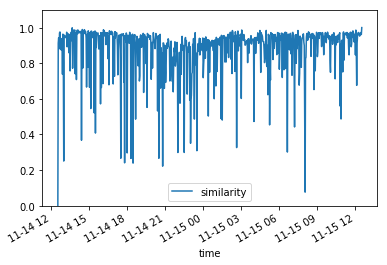

In [27]:
new_df.plot()
plt.ylim(0)
plt.show()


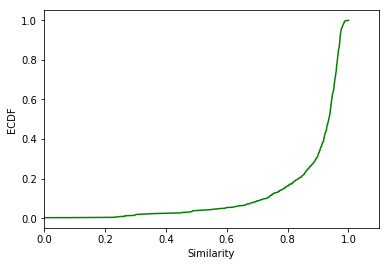

In [28]:
plt.plot(getECDF(new_df), color= 'green', linestyle='-')
plt.xlabel('Similarity')
plt.ylabel('ECDF')
plt.xlim(0)
plt.show()